In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import math
from cvxpy import *

In [2]:
def createdata(m,n,k):
    A,Rtmp=np.linalg.qr(np.random.standard_normal((n,m)))
    A=A.T
    p=np.random.permutation(n)
    p=p[0:k]
    x0=np.zeros((n,1))
    x0[p]=np.random.standard_normal((k,1))
    b=np.dot(A,x0)+0.02*np.random.standard_normal((m,1))
    plt.plot(x0)
    plt.show()
    lambda_max=np.linalg.norm(A*b)
    lambda0 = 0.1*lambda_max;
    return A,b,x0,lambda0

In [3]:
#run cases
def Question6(m,n,k,its):
    A,b,x0,lambda0 = createdata(m,n,k)
    b1,obj1 = coordD(A,b,lambda0,its,n,m)
    b0,obj0 = proxD(A,b,lambda0,its,n)
    plt.plot(obj0)
    plt.plot(obj1)
    plt.show()
    checkCVX(n,A,b,b1,b0,lambda0)

In [4]:
def calcres(i,A,b1,b,m):
    Atemp = np.delete(A,i,1)
    btemp = np.delete(b1,i,0)
    xB = np.reshape(np.dot(Atemp,btemp),(m,1))
    res = b-xB
    return res
def sthresh(l,y):
    if y>l:
        output = y-l
    elif np.abs(y)<=l:
        output = 0
    elif y<(l*-1):
        output =y +l
    return output

In [5]:
def prox(x,l,n):
    prox = np.zeros((n,1))
    for i in range(n):
        prox[i] = np.subtract(x[i],(min(l,np.abs(x[i]))*np.sign(x[i])))
    return prox

In [6]:
## coordinate descent
def coordD(A,b,lambda0,its,n,m):
    b1 = np.random.uniform(-10,10,(n,1))
    j = 0
    obj1 = np.zeros(its)
    stop =False
    while j<its:
        for i in range(n):
            res2 = calcres(i,A,b1,b,m)
            col = A[:,i]
            b1[i] = sthresh(lambda0/(np.dot(col.T,col)),(np.dot(col.T,res2))/(np.dot(col.T,col)))

            obj1[j] = (0.5*(sum_squares(A*np.reshape(b1,(n)) - b))+(lambda0*norm(b1,1))).value
        j+=1
    return b1, obj1

In [7]:
#proximal descent
def proxD(A,b,lambda0,its,n):
    a = 1/np.linalg.norm((np.dot(A.T,A)),2)
    b0 = np.random.uniform(-10,10,(n,1))
    obj0 = np.zeros(its)
    j=0
    while j<its:
        calc = (b0 - np.dot(a*A.T,(np.dot(A,b0)-b)))
        b0 = prox(calc,lambda0,n)
        obj0[j] = (0.5*(sum_squares(A*np.reshape(b0,(n)) - b))+(lambda0*norm(b0,1))).value
        j+=1
    return b0, obj0

In [8]:
# Construct the problem.
def checkCVX(n,A,b,b1,b0,lambda0):
    x = Variable(n)
    objective = Minimize(0.5*(sum_squares(A*x - b))+(lambda0*norm(x,1)))
    prob = Problem(objective)
    result = prob.solve()


    plt.plot(np.reshape(b1,(n,1)))
    plt.plot(np.reshape(b0,(n,1)))
    plt.plot(x.value)
    plt.show()
    print "Coordinate descent", np.linalg.norm((np.reshape(b1,(n,1))-x.value),1)
    print "Proximal descent", np.linalg.norm((np.reshape(b0,(n,1))-x.value),1)

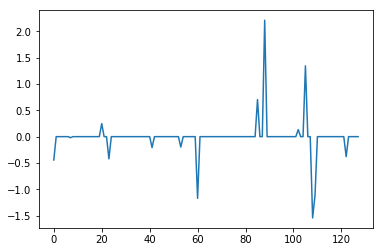

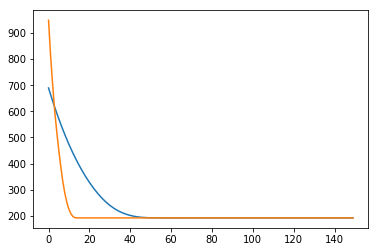

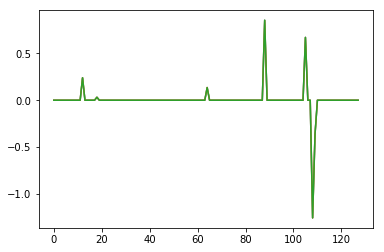

Coordinate descent 9.80760122874e-08
Proximal descent 0.0041605733128


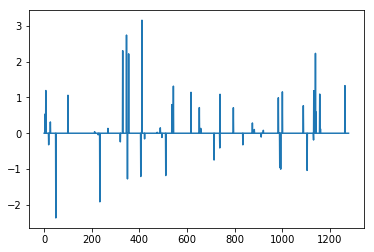

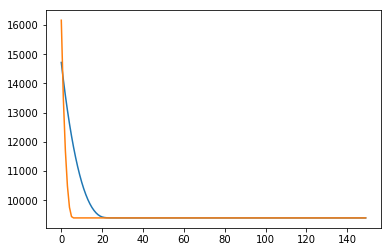

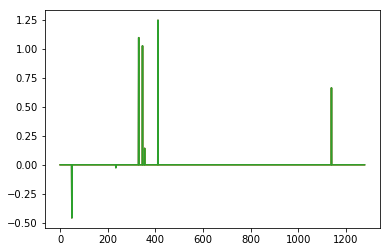

Coordinate descent 1.32564416013e-07
Proximal descent 1.32564387702e-07


In [9]:
# case = [30,128,14] #[300, 1280, 50] [30,128,14]
# m=case[0]
# n=case[1] 
# k=case[2]
its = 150
Question6(30,128,14,its)
Question6(300,1280,50,its)